In [232]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Before loading the lung_disease file I deleted 'Scan' coloumn and replace T with 1 F with 0 Male with 1 and female with 0

df = pd.read_excel('lung_disease.xlsx')
# I read on internet and found tidal volume is around 10 percent of the vital capacity hence used that
df['Tidal_Volume']=df['FVC']/10

X = df.drop(columns=['FVC','Tidal_Volume'])
y = df['Tidal_Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [233]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='relu') )

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=250,validation_split=0.1, batch_size=32)
model.save("Tidal_Volume(litre).keras")




Epoch 1/250


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0676 - val_loss: 0.0259
Epoch 2/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0420 - val_loss: 0.0126
Epoch 3/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0242 - val_loss: 0.0218
Epoch 4/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0253
Epoch 5/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 - val_loss: 0.0135
Epoch 6/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - val_loss: 0.0199
Epoch 7/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 - val_loss: 0.0218
Epoch 8/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.0261
Epoch 9/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0135
Epoch 10/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - val_loss: 0.0253
Epoch 11/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0126 - val_loss: 0.0204
Epoch 12/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error: 0.001787670435166954


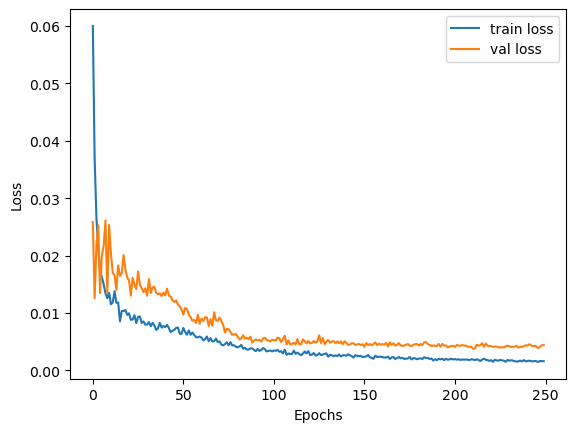

In [244]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [255]:
from tensorflow.keras.models import load_model
loaded_model=load_model("Tidal_Volume(litre).keras")
scaler = StandardScaler()
X_1 = scaler.fit_transform(X)
y_predicted=loaded_model.predict(X_1)
mse = mean_squared_error(y, y_predicted)
print(f'Mean Squared Error on complete dataset: {mse}')
y_pred=loaded_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error test set: {mse}')
comparison_df = pd.DataFrame(np.concatenate([y.values.reshape(-1, 1), y_predicted], axis=1), columns=['Actual', 'Predicted'])
print(comparison_df.head(11))
print(comparison_df.tail(11))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error on complete dataset: 0.0014505463625578685
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error test set: 0.001787670435166954
    Actual  Predicted
0    0.285   0.295055
1    0.340   0.332429
2    0.276   0.294285
3    0.368   0.375162
4    0.244   0.217906
5    0.248   0.245321
6    0.436   0.431967
7    0.319   0.313775
8    0.316   0.307489
9    0.232   0.351058
10   0.256   0.259161
     Actual  Predicted
459   0.428   0.403226
460   0.465   0.432520
461   0.184   0.233960
462   0.212   0.221877
463   0.344   0.331563
464   0.308   0.250744
465   0.388   0.262566
466   0.376   0.372774
467   0.304   0.287353
468   0.196   0.237260
469   0.472   0.442358
